In [1]:
options(warn=-1)
options(repr.plot.width=10, repr.plot.height=5)

# Data Preparation

In [2]:
suppressMessages(library(CausalImpact))
suppressMessages(library(dplyr))

In [3]:
df <- read.csv("dataset//20180916-bukalapak-campaign.csv")

# Analysis

## Causal Impact

We'll use Tokopedia search query data as reference point; considering that it is highly correlated to Bukalapak's (0.96).

### First campaign

In [4]:
pre.period <- as.Date(c('2015-01-01','2016-12-01'))
post.period <- as.Date(c('2017-01-01','2017-06-01'))

In [5]:
time.points <- as.Date(df$Month)
data <- zoo(cbind(df$observed_bukalapak, df$observed_tokopedia), time.points)
# data <- zoo(cbind(subset(df, !is.na(residual_bukalapak))$residual_bukalapak,
#                   subset(df, !is.na(residual_tokopedia))$residual_tokopedia), time.points)

In [6]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

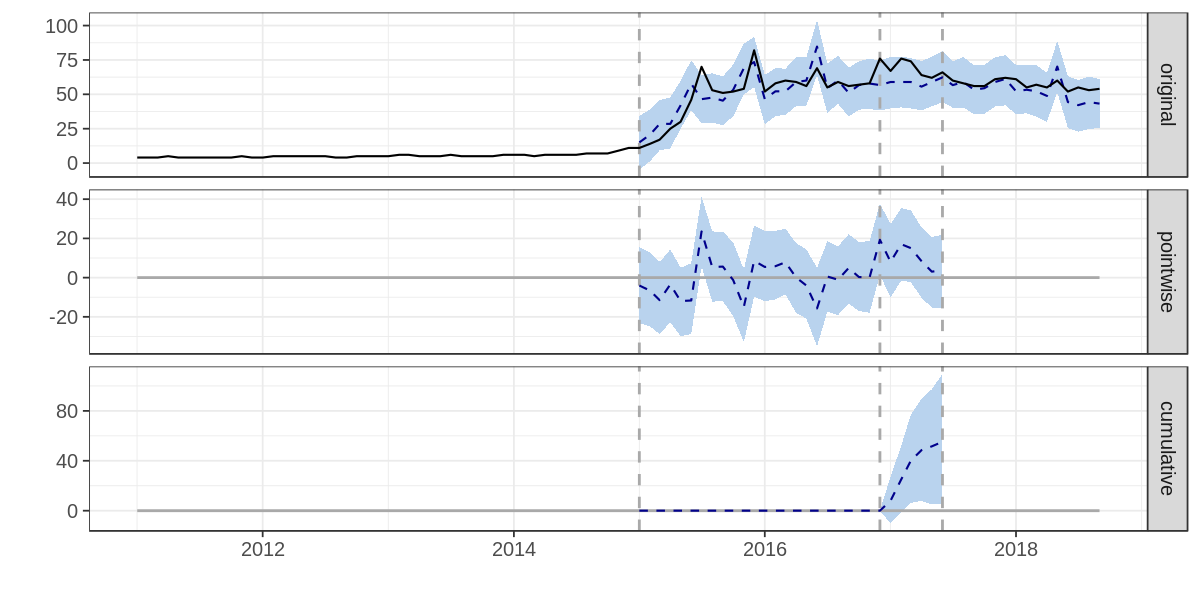

In [7]:
plot(ci)

In [8]:
summary(ci)

Posterior inference {CausalImpact}

                         Average       Cumulative 
Actual                   68            409        
Prediction (s.d.)        59 (4,4)      354 (26,5) 
95% CI                   [50, 67]      [299, 404] 
                                                  
Absolute effect (s.d.)   9,2 (4,4)     55,2 (26,5)
95% CI                   [0,88, 18]    [5,29, 110]
                                                  
Relative effect (s.d.)   16% (7,5%)    16% (7,5%) 
95% CI                   [1,5%, 31%]   [1,5%, 31%]

Posterior tail-area probability p:   0,01881
Posterior prob. of a causal effect:  98,119%

For more details, type: summary(impact, "report")



In [9]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 68,17. By contrast, in the absence of an intervention, we would have expected an average response of 58,96. The 95% interval of this counterfactual prediction is [49,89, 67,29]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 9,21 with a 95% interval of [0,88, 18,28]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 409,00. By contrast, had the intervention not taken place, we would have expected a sum of 353,75. The 95% interval of this prediction is [299,33, 403,71].

The above results are given in terms of absolute numbers. In relative terms, the response variable s

### Second campaign

In [10]:
pre.period <- as.Date(c('2015-01-01','2017-06-01'))
post.period <- as.Date(c('2017-07-01','2018-09-01'))

In [11]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

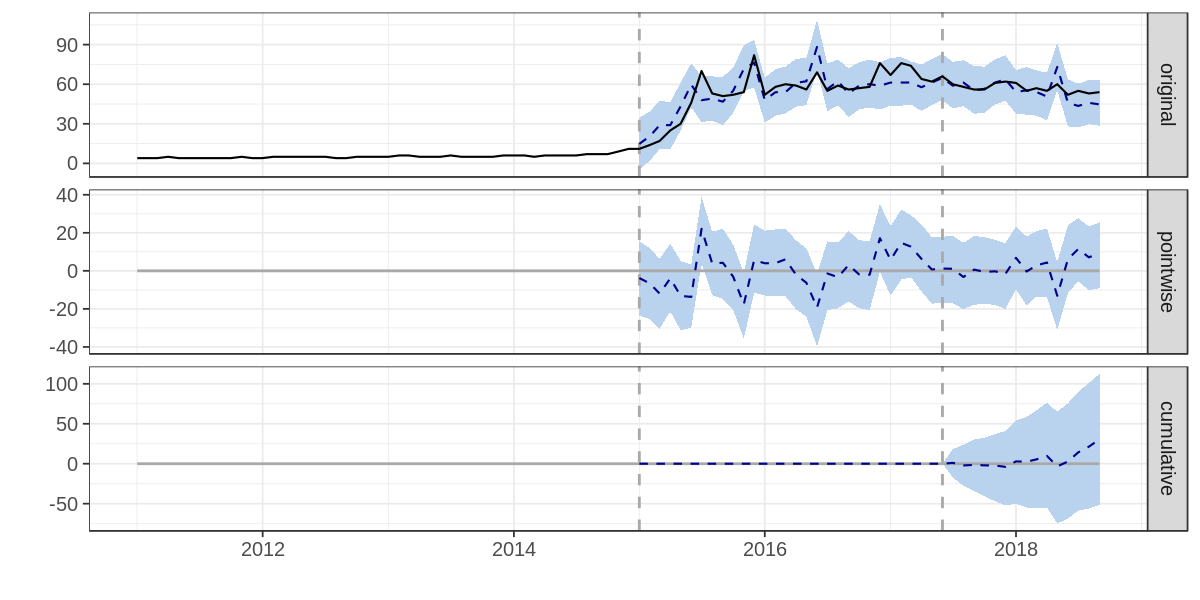

In [12]:
plot(ci)

In [13]:
summary(ci)

Posterior inference {CausalImpact}

                         Average        Cumulative    
Actual                   57             855           
Prediction (s.d.)        55 (2,8)       824 (42,5)    
95% CI                   [50, 60]       [743, 907]    
                                                      
Absolute effect (s.d.)   2 (2,8)        31 (42,5)     
95% CI                   [-3,5, 7,5]    [-51,8, 112,5]
                                                      
Relative effect (s.d.)   3,7% (5,2%)    3,7% (5,2%)   
95% CI                   [-6,3%, 14%]   [-6,3%, 14%]  

Posterior tail-area probability p:   0,2386
Posterior prob. of a causal effect:  76%

For more details, type: summary(impact, "report")



In [14]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 57,00. In the absence of an intervention, we would have expected an average response of 54,96. The 95% interval of this counterfactual prediction is [49,50, 60,46]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 2,04 with a 95% interval of [-3,46, 7,50]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 855,00. Had the intervention not taken place, we would have expected a sum of 824,38. The 95% interval of this prediction is [742,54, 906,85].

The above results are given in terms of absolute numbers. In relative terms, the response variable showed an increase of +4%. 

## Bayesian Changepoint

Using this approach, we'll try to detect on which point the pattern changes. We split the changepoint analysis into some periods:
- January 2016 to June 2017: before and after first campaign
- January 2017 to September 2018: after first and second campaign

In [15]:
df$Month <- as.POSIXct(df$Month, format='%Y-%m-%d')

Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


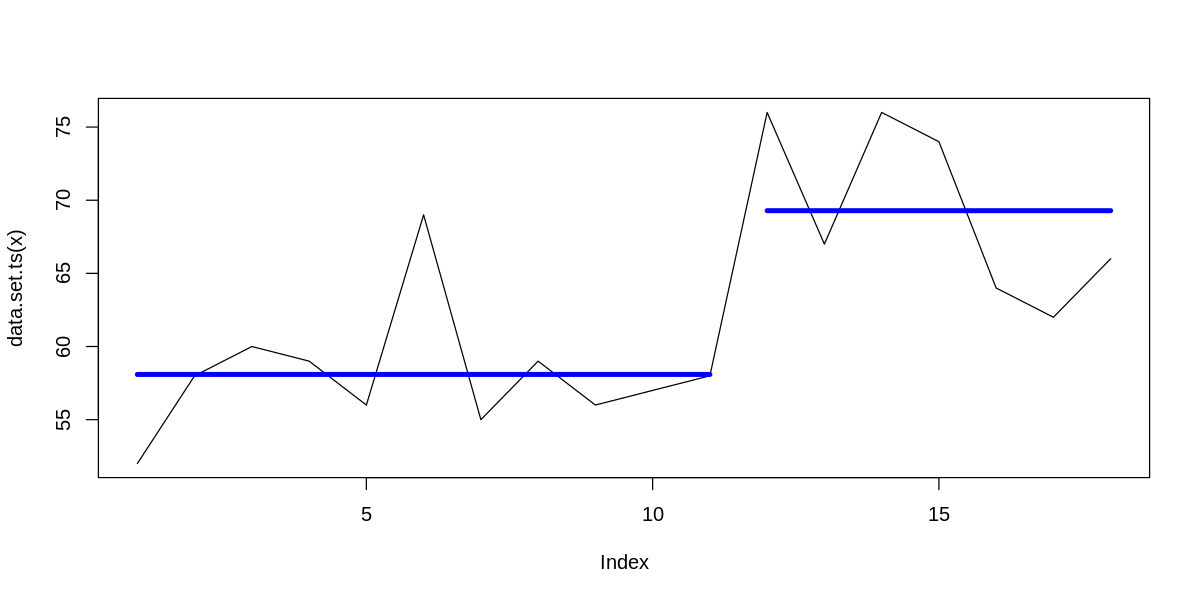

In [16]:
library("changepoint")

results <- cpt.mean(subset(df, Month >= '2016-01-01' & Month < '2017-07-01')$observed_bukalapak)
plot(results,cpt.col="blue",xlab="Index",cpt.width=4)

Changepoint: January 2018; when the first campaign started.

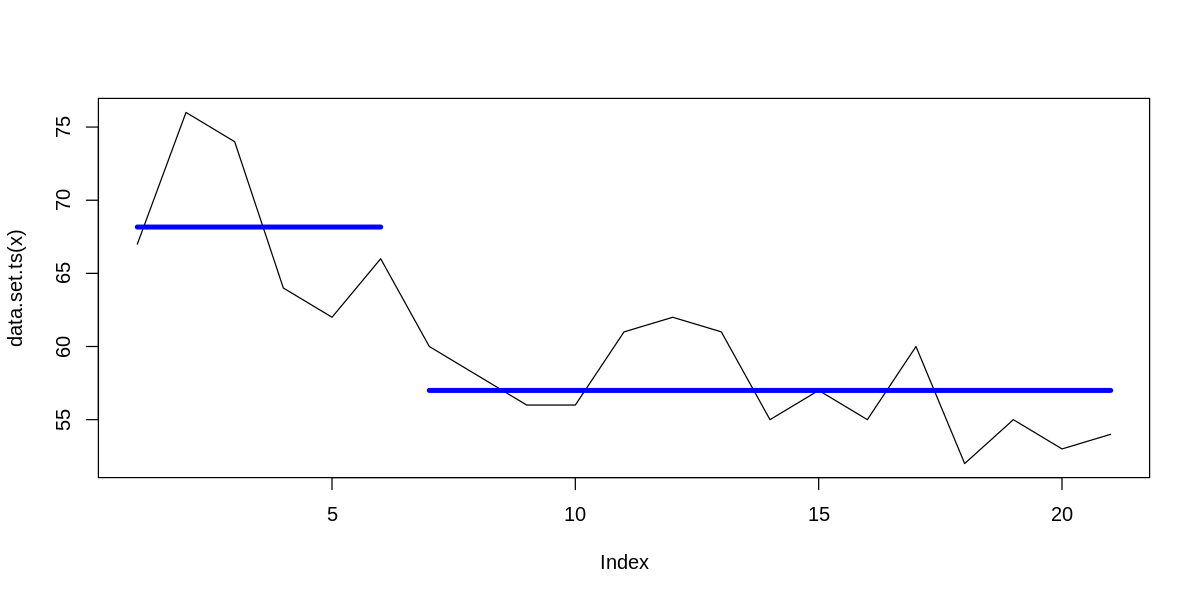

In [17]:
library("changepoint")

results <- cpt.mean(subset(df, Month >= '2017-01-01')$observed_bukalapak)
plot(results,cpt.col="blue",xlab="Index",cpt.width=4)

Changepoint: July 2018 -  when second campaign started; but since causal impact analysis shows insignificant effect, we can infer that the changes do not happen because of the campaign.

# References

- https://www.r-bloggers.com/a-simple-intro-to-bayesian-change-point-analysis/
- https://cscherrer.github.io/post/bayesian-changepoint/